<a href="https://colab.research.google.com/github/lfr4704/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LR_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
import pandas as pd
import numpy as np
import math

sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
sales
  

array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [0]:
def stats_mean(list):
  '''this functions calculates
  mean of a list'''
  mean = 0
  sum_list = 0
  for num in list:
    sum_list = sum_list + num
  mean = sum_list/len(list)
  return mean

In [4]:
print(f"Mean: {stats_mean(sales)}")

Mean: 3052.714285714286


In [5]:
mean = stats_mean(sales)
mean

3052.714285714286

##variance

In [0]:
def subtract_mean(number):
  '''this function calculates the 
  distance of a number from the mean'''
  return number-mean

In [7]:
#use map to apply subract_mean function to sales
distances = list(map(subtract_mean,sales))
distances


[452.2857142857142,
 -652.7142857142858,
 -25.71428571428578,
 -254.71428571428578,
 647.2857142857142,
 197.28571428571422,
 -363.7142857142858]

In [8]:
#square the and sum all of those distances
squared_distances = list(map(lambda x: x**2, distances))
squared_distances

[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [0]:
#how long is our list
list_length_sample= len(squared_distances)-1 
list_length_pop= len(squared_distances)

In [10]:
#calculate variance
variance_sales = sum(squared_distances)/list_length_pop
print('Variance: {:.2f}'.format(variance_sales))

Variance: 183761.06


#standard deviation

In [11]:
print('Standard deviation {:.2f}'.format(math.sqrt(variance_sales)))

Standard deviation 428.67


In [12]:
#check using numpy
print(np.mean(sales))
print('{:.2f}'.format(np.var(sales)))
print(np.std(sales))

3052.714285714286
183761.06
428.67360686714756


In [13]:
#check answers using pandas
sales_df = pd.DataFrame({"sales": sales})
print('mean:', sales_df["sales"].mean())

mean: 3052.714285714286


In [0]:
#putting everything in a function 
#this function is not a good practice as
#a function should only be in charge of doing 
#one thing only
def stats_calcs(numbers):
  '''this functions calculates
  mean and standar deviation of a list'''
  mean = 0
  sum_list = 0
  for num in numbers:
    sum_list = sum_list + num
  mean = sum_list/len(numbers)
  distances = list(map(lambda x: x-mean,numbers))
  squared_distances = list(map(lambda x: x**2, distances))
  variance = sum(squared_distances)/len(squared_distances)
  stdv = math.sqrt(variance)
  return mean, stdv

In [15]:
stats_calcs(sales)

(3052.714285714286, 428.67360686714756)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [17]:
np.cov(sales,customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [18]:
#find covariance using numpy
print('{:.2f}'.format(np.cov(sales, customers)[0][1]))

7604.36


In [19]:
sales_df

,sales
0,3505
1,2400
2,3027
3,2798
4,3700
5,3250
6,2689


In [20]:
#find the covariance matrix using pandas
sales_df['customers'] = pd.Series(customers)
sales_df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
#calculate standard deviation using pandas
std_s = sales_df['sales'].std(ddof=1)
std_c = sales_df['customers'].std(ddof=1)

In [22]:
print(std_s)
print(std_c)

463.0204150595357
17.057326313123664


In [23]:
#calculate covariance using pandas
cov_s = sales_df['sales'].cov(sales_df['customers'])
cov_s

7604.357142857142

In [0]:
#calculate denominator for correlation
denom = std_c*std_s

In [25]:
corr_cs = cov_s/denom
corr_cs

0.9628339778148909

In [26]:
#using pandas to find correlation
sales_df['sales'].corr(sales_df['customers'])

0.9628339778148909

In [27]:
#shorter way to find correlation of two variables
sales_df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
titanic = pd.read_csv(url)

In [29]:
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [30]:
titanic.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest', 'has_cabin_number'],
      dtype='object')

In [31]:
#removed unnamed column
titanic_clean = titanic.drop(['Unnamed: 0'], axis=1)
titanic_clean.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [32]:
#calculate covariance for the entire dataset
titanic_clean.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [33]:
#calculate the correlation of the entire database
titanic_clean.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


<function matplotlib.pyplot.show>

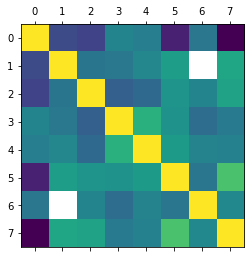

In [34]:
import matplotlib.pyplot as plt
plt.matshow(titanic_clean.corr())
plt.show

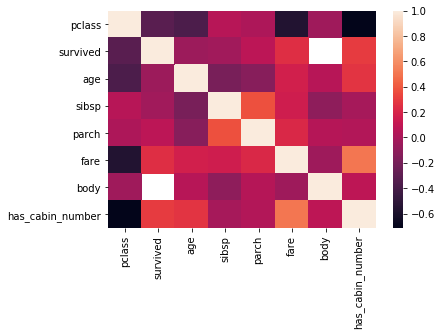

In [35]:
#plotting correlation with plasma seaborn 
#negative correlations are shown with black
#positve correlation are shown with red
import seaborn as sns
sns.heatmap(titanic_clean.corr());

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

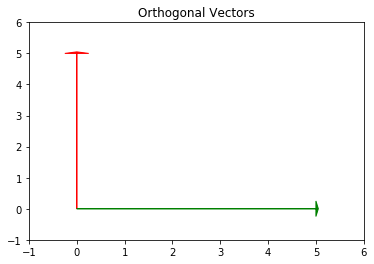

In [36]:
#if the dot product of two vectors is zero then they are orthagonal or perpendicular to each other

vector_1 = [0,5]
vector_2 = [5,0]

#plot the scaled vectors
plt.arrow(0,0, vector_1[0], vector_1[1], head_width=0.5, head_length=0.05, color='red')
plt.arrow(0,0, vector_2[0], vector_2[1], head_width=0.5, head_length=0.05, color='green')
plt.xlim(-1,6)
plt.ylim(-1,6)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [37]:
#calculate dot product
vector_a = [-5,3,7]
vector_b = [6,-8,2]

print('the dot product is:', np.dot(vector_a,vector_b))

the dot product is: -40


Since the dot product of the vector a and b is not equal to zero then the vectors are not orthagonal.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [2,-15,6,20]

In [39]:
#calculate the norm or the LENGTH OF THE VECTOR
norm_c = np.linalg.norm(c)
print(norm_c**2)

665.0


In [40]:
#calculate the dot product
print('the dot product is: ', np.dot(c,c))

the dot product is:  665


In [41]:
#calculate the transpose
C = np.array(c)
pd.DataFrame(C)

,0
0,2
1,-15
2,6
3,20


In [42]:
#create transpose
C_T = pd.DataFrame(C.T)
C_T

,0
0,2
1,-15
2,6
3,20


In [43]:
#multiple transpose times c
np.dot(C_T,c)

ValueError: ignored

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = [4,12,11,9,2]

In [0]:
#this is not a unit vector since the legnth is not equal to 1
norm_f = np.linalg.norm(f)
norm_f

In [0]:
#the corresponding unit vector
f_hat = f/norm_f
f_hat

In [0]:
norm_f_hat = np.linalg.norm(f_hat)
norm_f_hat

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
#linearly dependet vectors
vector_1 = [0,5]
vector_2 = np.multiply(vector_1, 2)
print(vector_1, '\n', vector_2)


In [0]:
#plot vectors
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,5)
plt.ylim(0,11)

for myvect, mycolor, width in [(vector_1, 'cyan', 15), (vector_2, 'crimson', 5)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=0.2,
            linewidth=width,
            color=mycolor)


In [0]:
# Linearly independent vectors, not orthogonal
vector_1 = np.random.randint(low=-3, high=3, size=2) #what does size does here? 
vector_2 = np.random.randint(low=-3, high=3, size=2)
print(vector_1, '\n', vector_2)

In [0]:
#plot vectors
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,5)
plt.ylim(-2,5)

for myvect, mycolor, width in [(vector_1, 'cyan', 15), (vector_2, 'crimson', 5)]: #what is this called ((vector_1, 'cyan', 15))? a touple? 
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=0.2,
            linewidth=width,
            color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
vec_g = [1,2]
vec_h = [4,8]

In [0]:
#plot them
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,9)
plt.ylim(-2,9)

for myvect, mycolor, width in [(vec_g, 'cyan', 5), (vec_h, 'crimson', 5)]:  
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=0.2,
            linewidth=width,
            color=mycolor)

In [0]:
# This is one possible linear combination:
a,b=(4,3)
linear_combo= np.multiply(vec_g, a) + np.multiply(vec_h, b) 
print(linear_combo)

In [0]:
# This is a set of several linear combinations:
muchos_combos=[]
for (a,b) in [(2,3), (4,5), (6,7), (8,9)]:
    linear_combo = np.multiply(vector_1, a) + np.multiply(vector_2, b) 
    muchos_combos.append(linear_combo)
print(muchos_combos)

#the span for vectors g and h is R^2

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
#the span for these vectors is R^3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
# find basis vectors in 2-d
vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors

for myvec, width, mycolor in [(vector_1, .5, 'red'), (vector_2, .5, 'green')]:
  plt.arrow(0,0,
            myvec[0],
            myvec[1],
            head_width=width,
            head_length=0.5,
            color=mycolor)

plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

a set of vectors that are linerarly independent and that span the vecotr space V

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [45]:
#The rank of a matrix is the dimension of the vector space spanned by its columns.
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(P)

3

In [46]:

# Return a 2-D array with ones on the diagonal and zeros elsewhere.
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 7.2 What does the rank of a matrix tell us?

This matrix spans in 3 dimensions

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()